In [1]:
import tensorflow as tf

In [2]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    biases = tf.Variable(tf.zeros([1,out_size])+0.1)
    Wx_plus_b = tf.matmul(inputs,Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [3]:
import numpy as np

In [4]:
x_data = np.linspace(-1,1,300)[:,np.newaxis]

In [5]:
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data)-0.5+noise

In [6]:
x_data.shape

(300, 1)

In [7]:
xs = tf.placeholder(tf.float32,[None,1])
ys = tf.placeholder(tf.float32,[None,1])

In [8]:
l1 = add_layer(xs,1,10,activation_function=tf.nn.relu)
prediction = add_layer(l1,10,1,activation_function=None)

In [9]:
loss = tf.reduce_mean(tf.reduce_mean(tf.square(ys-prediction),reduction_indices=[1]))

In [10]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
init = tf.global_variables_initializer()

In [11]:
sess = tf.Session() 
sess.run(init)

In [12]:
for i in range(1000):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if i %50 == 0:
        print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))

0.245283
0.0132331
0.00791335
0.00639395
0.00567417
0.00526439
0.00497879
0.00477103
0.00462142
0.00448703
0.00439118
0.00431991
0.00426993
0.00421801
0.00417637
0.00413159
0.00409468
0.00405269
0.00400871
0.00396639


In [39]:
%matplotlib qt
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


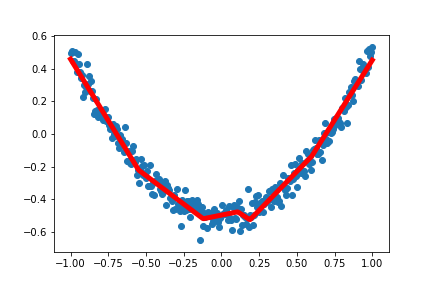

F:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


NotImplementedError: 

<IPython.core.display.Javascript object>


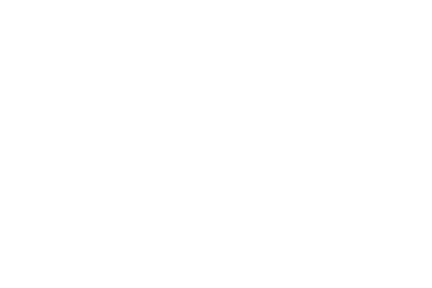

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.ion()
plt.show()

for i in range(1000):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if i %50 == 0:
        try:
            ax.lines.remove(lines[0]) 
        except Exception:
            pass
        prediction_value = sess.run(prediction,feed_dict={xs:x_data})
        lines = ax.plot(x_data,prediction_value,'r-',lw=5)
        plt.pause(0.1)